# Proyecto Integrador

El objetivo de este entregable es analizar el conjunto de datos de nuestro proyecto integrador del diplomado.
Realizaremos un análisis exploratorio estadístico para comprender la composición de nuestro conjunto de datos para el set de flights.csv con información de operaciones aéreas que se nos proporcionó (citar fuente).

Primero importaremos los datos y los módulos con los que trabajaremos y a continuación definiremos las tareas que se realizarán como parte del entregable:

In [7]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from statsmodels.stats.weightstats import ztest

airline_path = '../../../datasets/airlines.csv'
#airport_path = 'datasets/airports.csv'
flights_path = '../../../datasets/flights.csv'

In [8]:
# Set data on import
def parse_if_str(s):
    try: return str(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

# def parse_ndarray(s):
#     return np.fromstring(s, sep=' ') if s else None

In [9]:
fdf = pd.read_csv(flights_path, converters = {
    'DESTINATION_AIRPORT': parse_if_str,
    'ORIGIN_AIRPORT': parse_if_str})

In [4]:
adf = pd.read_csv(airline_path)

## Parte I: Análisis exploratorio 

1. Medidas de tendencia central

    a.	Explora las variables del conjunto de datos flights.csv, observa lo siguiente:
        
        i. La forma de los datos. Utiliza las funciones de pandas para obtener información sobre la cantidad de filas y columnas existentes. 
        ii. La cantidad de datos faltantes. Obtén un resumen de los datos faltantes de las variables en el conjunto de datos y observa si puede ser un problema para el análisis.
        iii. Tipos de datos de las variables. Explora el tipo de dato de las variables y analiza si son los tipos esperados.
        iv. Estadísticas generales de las variables
            1. Máximo y mínimo
            2. Media y mediana
            
    b.	Explora las medidas de tendencia central de los retrasos en las aerolíneas, contesta las siguientes preguntas:
        
        i. ¿Qué destinos tienen mayor cantidad de vuelos en nuestro conjunto de datos?
        ii. ¿Qué aerolíneas tienen mayor cantidad de vuelos en nuestro conjunto de datos?
        iii. ¿Qué aerolíneas presentan más retrasos?
        iv. ¿Qué destinos presentan más retrasos?
        v. ¿Cuáles son los retrasos más grandes en las aerolíneas?
        vi. Compara las medidas de dispersión entre las aerolíneas.

2.	Distribuciones de probabilidad
    
    a.	Explora las distribuciones de los datos
    
        i.	Grafica la distribución de tiempos de retraso de los vuelos y contesta las siguientes preguntas:
            1.	¿Cómo se distribuye el tiempo de retraso?
            2.	¿Es parecido a una distribución normal?
            3.	¿Parece seguir alguna otra distribución? 



## a. Explora las variables del conjunto de datos flights.csv

###  i. La forma de los datos. Utiliza las funciones de pandas para obtener información sobre la cantidad de filas y columnas existentes.

In [6]:
# Observar la forma del dataset
fdf.shape

(5819079, 31)

### ii. La cantidad de datos faltantes

In [7]:
# Imprimir datos faltantes
fdf.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Existe una gran cantidad de datos faltantes, lo que podría representar un problema al analizar el set dependiendo aunque el patrón que se observa podría indicar que se puede hacer un barrido de los datos directamente sin necesidad modificar mucho el grupo de datos que filtremos.</li>
</ul>
</p>

### iii. Tipos de datos de las variables. Explora el tipo de dato de las variables y analiza si son los tipos esperados.

In [8]:
fdf.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Originalmente los datos no eran necesariamente los esperados pero usamos una función de parsing personalizada para los aeropuertos de origen y de destino.</li>
</ul>
</p>

### iv. Estadísticas generales de las variables
     1. Máximo y mínimo
     2. Media y mediana

In [9]:
fdf.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


## Parte II: Intervalos de confianza y pruebas de hipótesis

3.	Incertidumbre e intervalos de confianza

        a.	Calcula el promedio de retraso de cada aerolínea
        
        b.	Calcula los intervalos de confianza con un 95% de confianza
        
        c.	Grafica los intervalos de confianza 

4.	Pruebas de hipótesis
    
        a.	Plantear el problema
        
            i.	Tenemos que decidir entre una aerolínea u otra. Somos viajeros frecuentes en Spirit Air Lines, si queremos viajar con la menor posibilidad de retrasos nos han recomendado United Airlines. Corroboremos con base en datos si cambiar de aerolínea a United Airlines. 
    
        b.	Plantear la hipótesis
        
            i.	Plantea la hipótesis nula y la hipótesis alternativa. 
    
        c.	Utiliza una prueba t para probar o rechazar la hipótesis, escribe tus conclusiones con base en los resultados obtenidos. 


### 3. Incertidumbre e intervalos de confianza

In [10]:
# Calcular promedio de retraso de cada aerolinea
airline_means = fdf[fdf['ARRIVAL_DELAY']>0].groupby('AIRLINE')['ARRIVAL_DELAY'].mean()
airline_means

AIRLINE
AA    34.148364
AS    22.562411
B6    38.132807
DL    32.077424
EV    35.198042
F9    41.190435
HA    15.379767
MQ    39.509202
NK    40.659852
OO    32.437278
UA    39.209314
US    27.419925
VX    30.725227
WN    29.418496
Name: ARRIVAL_DELAY, dtype: float64

In [11]:
pop_stdev = fdf[fdf['ARRIVAL_DELAY']>0]['ARRIVAL_DELAY'].std()
pop_mean = fdf[fdf['ARRIVAL_DELAY']>0]['ARRIVAL_DELAY'].mean()

In [12]:
fdf[fdf['AIRLINE']=='AA'].shape[0]

725984

In [13]:
# en estas listas vacías guardaremos las medias y
# los intervalos de las muestras.
intervals = []
sample_means = []

# Iteramos en los promedio de las aerolineas
for a,m in zip(airline_means.index, airline_means):
    # guardamos la media en la lista
    sample_means.append(m)
    # valor crítico 95% de confianza
    z_critical = 2  # for 95%
    
    margin_of_error = z_critical * (pop_stdev/math.sqrt(fdf[fdf['AIRLINE']==a].shape[0]))

    ubound = m + margin_of_error
    lbound = m - margin_of_error
    
    confidence_interval = (lbound,ubound)  
    # guardamos los intervalos
    intervals.append(confidence_interval)
    
    print(f"Airline: {a} with mean {m:.2}", end=" - ")
    print(f"Margen de error: {margin_of_error:.2}", end=" - ")
    print(f"Límite inferior: {lbound:.2}; límite superior: {ubound:.2}")

Airline: AA with mean 3.4e+01 - Margen de error: 0.12 - Límite inferior: 3.4e+01; límite superior: 3.4e+01
Airline: AS with mean 2.3e+01 - Margen de error: 0.25 - Límite inferior: 2.2e+01; límite superior: 2.3e+01
Airline: B6 with mean 3.8e+01 - Margen de error: 0.2 - Límite inferior: 3.8e+01; límite superior: 3.8e+01
Airline: DL with mean 3.2e+01 - Margen de error: 0.11 - Límite inferior: 3.2e+01; límite superior: 3.2e+01
Airline: EV with mean 3.5e+01 - Margen de error: 0.14 - Límite inferior: 3.5e+01; límite superior: 3.5e+01
Airline: F9 with mean 4.1e+01 - Margen de error: 0.35 - Límite inferior: 4.1e+01; límite superior: 4.2e+01
Airline: HA with mean 1.5e+01 - Margen de error: 0.38 - Límite inferior: 1.5e+01; límite superior: 1.6e+01
Airline: MQ with mean 4e+01 - Margen de error: 0.2 - Límite inferior: 3.9e+01; límite superior: 4e+01
Airline: NK with mean 4.1e+01 - Margen de error: 0.31 - Límite inferior: 4e+01; límite superior: 4.1e+01
Airline: OO with mean 3.2e+01 - Margen de err

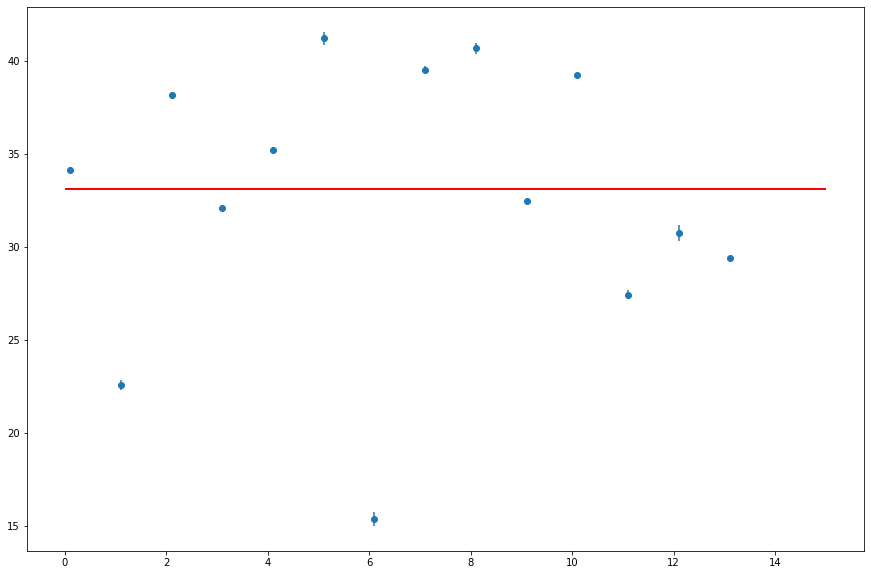

In [14]:
# Creamos una gráfica con estos datos
# establecemos el tamaño de la gráfica
plt.figure(figsize=(15,10))

# graficamos en los puntos las medias y los errores
plt.errorbar(x=np.arange(0.1, 14, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

# graficamos una línea horizontal en el lugar de la media poblacional.
plt.hlines(xmin=0, xmax=15,
           y=pop_mean,
           linewidth=2.0,
           color="red");

<AxesSubplot:xlabel='AIRLINE', ylabel='ARRIVAL_DELAY'>

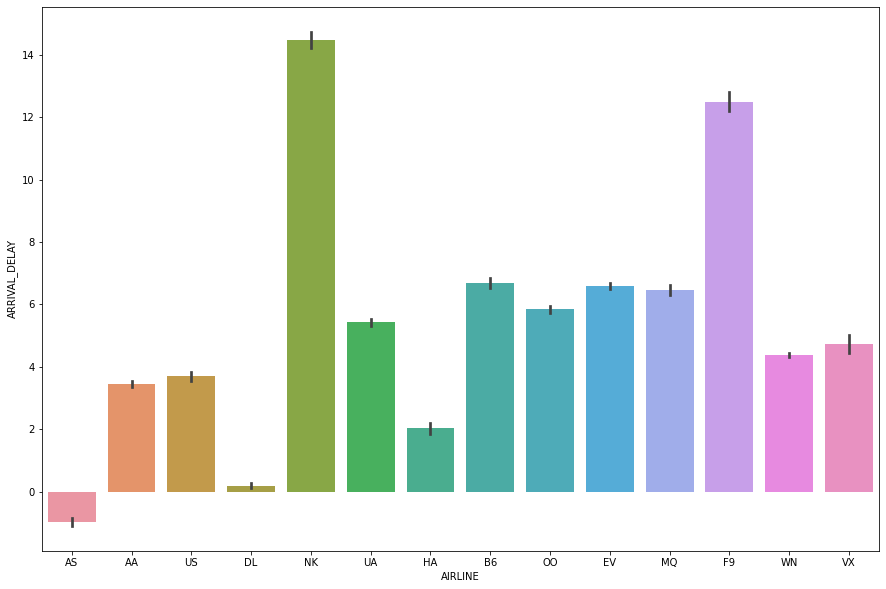

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x='AIRLINE',y='ARRIVAL_DELAY',data=fdf, ci=95)

## 4. Pruebas de hipótesis

        a.	Plantear el problema
        
            i.	Tenemos que decidir entre una aerolínea u otra. Somos viajeros frecuentes en Spirit Air Lines, si queremos viajar con la menor posibilidad de retrasos nos han recomendado United Airlines. Corroboremos con base en datos si cambiar de aerolínea a United Airlines. 
    
        b.	Plantear la hipótesis
        
            i.	Plantea la hipótesis nula y la hipótesis alternativa.
            
                h0 = Spirit Airlines tiene la misma media de retraso que United Airlines
                h1 = Spirit Airlines tiene un retraso medio mayor al de United Airlines
    
        c.	Utiliza una prueba t para probar o rechazar la hipótesis, escribe tus conclusiones con base en los resultados obtenidos. 


### b. Plantear la hipótesis

In [16]:
# b. Plantear la hipótesis
h0 = "Spirit Airlines tiene la misma media de retraso que United Airlines"
h1 = "Spirit Airlines tiene un retraso medio mayor al de United Airlines"

In [17]:
adf

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [18]:
# Seleccionamos United Airlines com la población contra quién comparar
united_mean = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="United Air Lines Inc."]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY'].mean()

united_std = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="United Air Lines Inc."]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY'].std()

united_n = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="United Air Lines Inc."]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY'].shape[0]

# Seleccionamos Spirit Air Lines como el sample
spirit_mean = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="Spirit Air Lines"]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY'].mean()

spirit_std = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="Spirit Air Lines"]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY'].std()

spirit_n = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="Spirit Air Lines"]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY'].shape[0]

print(f"United mean is: {united_mean}, the standar deviation is: {united_std} with a total of: {united_n} datapoints")
print(f"Spirit mean is: {spirit_mean}, the standar deviation is: {spirit_std} with a total of: {spirit_n} datapoints")

United mean is: 39.20931443883003, the standar deviation is: 57.82183864082278 with a total of: 186227 datapoints
Spirit mean is: 40.659851987273015, the standar deviation is: 53.37659469232893 with a total of: 56887 datapoints


### c. Utiliza una prueba t para probar o rechazar la hipótesis, escribe tus conclusiones con base en los resultados obtenidos.

In [19]:
# c. Utiliza una prueba t para probar o rechazar la hipótesis, escribe tus conclusiones
# con base en los resultados obtenidos.

# Calculamos la diferencia de las medias
delta_mean = united_mean - spirit_mean

# Calculamos la desviación estándar del pool
sp = math.sqrt(( ((united_n - 1) * pow(united_std,2)) + ((spirit_n - 1) * pow(spirit_std,2)) ) / (united_n + spirit_n - 2))

# Calculamos el valor z
zstat = delta_mean / (sp * math.sqrt((1 / united_n) + (1 / spirit_n)))

# Calculamos el valor p
pvalue = 2*(stats.norm.cdf(-abs(zstat)))

# Nuestra H0 es NO hay diferencia en los precios promedio de la muestra y de la población
#zstat = (sample_mean - pop_mean)/(pop_std/math.sqrt(sample_n))
# pvalue = 2*(stats.norm.cdf(-abs(zstat)))



print("Valor Z:",zstat)
print("pvalue", pvalue)

if pvalue < 0.05:
    print("Rechazamos la hipótesis nula, por tanto: ", h1)
else:
    print("Aceptamos la hipótesis nula, por tanto: ", h0)

Valor Z: -5.329728565616119
pvalue 9.835966093356327e-08
Rechazamos la hipótesis nula, por tanto:  Spirit Airlines tiene un retraso medio mayor al de United Airlines


In [20]:
from scipy.stats import ttest_ind
d1 = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="United Air Lines Inc."]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY']
d2 = fdf[(fdf['AIRLINE']==adf[adf['AIRLINE']=="Spirit Air Lines"]['IATA_CODE'].item()) &
                (fdf['ARRIVAL_DELAY']>0)]['ARRIVAL_DELAY']

tvalue, pvalue = ttest_ind(d1, d2)

print("Valor t:",tvalue)
print("pvalue", pvalue)

if pvalue < 0.05:
    print("Rechazamos la hipótesis nula, por tanto: ", h1)
else:
    print("Aceptamos la hipótesis nula, por tanto: ", h0)

Valor t: -5.329728565616119
pvalue 9.844697581126998e-08
Rechazamos la hipótesis nula, por tanto:  Spirit Airlines tiene un retraso medio mayor al de United Airlines


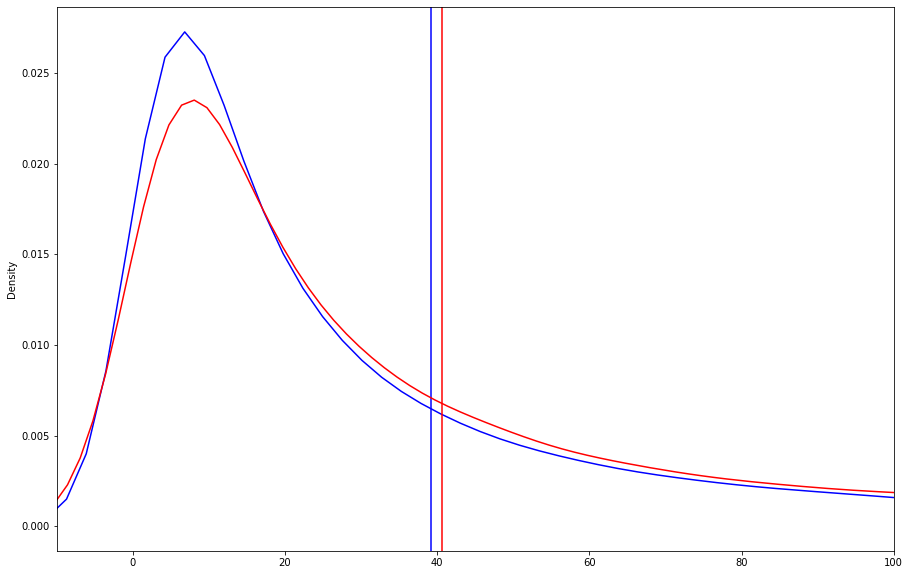

In [21]:
# Gráfica kde de United (azúl) y Spirit (rojo)
# Las líneas verticales corresponden a las medias.
plt.figure(figsize=(15,10))
d1.plot(kind='kde', xlim=(-10, 100), color='blue')
plt.axvline(d1.mean(), color='blue')
d2.plot(kind='kde', color='red')
plt.axvline(d2.mean(), color='red')

<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Hay una diferencia estadística significativa para asumir que United Airlines tiene un menor retraso a Spirit Airlines</li>
</ul>
</p>

<AxesSubplot:xlabel='AIRLINE'>

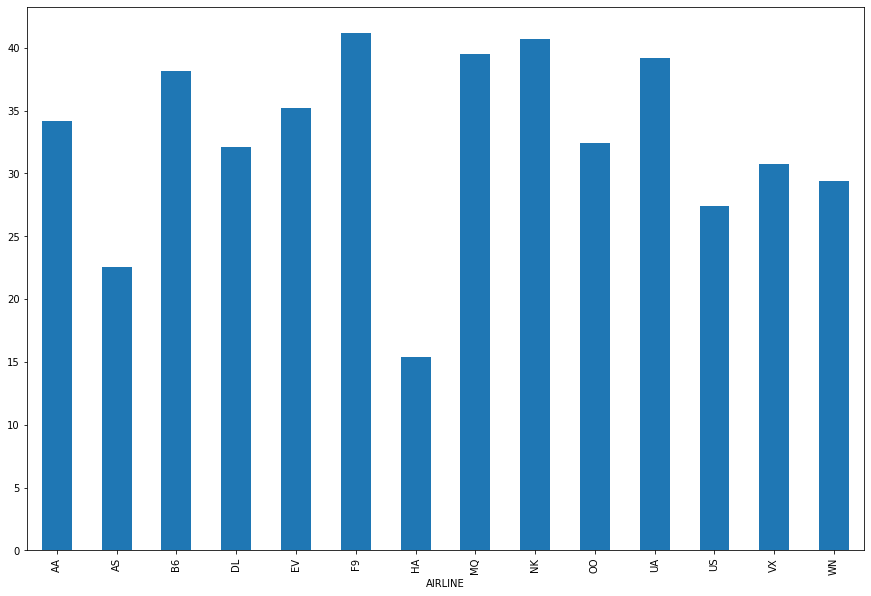

In [22]:
# Graficamos las medias de las aerolíneas
plt.figure(figsize=(15,10))
fdf[fdf['ARRIVAL_DELAY']>0].groupby('AIRLINE')['ARRIVAL_DELAY'].mean().plot.bar()

## Parte III:  Ingeniería de variables

5.	Ingeniería de variables
    
       a.Importancia de variables
        
            i. Determina la variable objetivo del problema.
            ii. Calcula la matriz de correlación
            iii. Determina las variables más relevantes para la variable objetivo.  

        b.	Imputación e interacción entre variables
        
            i. Exploración de los datos nulos
            ii. De las variables relevantes, ¿cuántos datos estamos perdiendo?
            iii. Analiza si podemos hacer una imputación sobre esas variables y escribe tus conclusiones. 


## a. Importancia de variables

### i. Determina la variable objetivo del problema.

<AxesSubplot:>

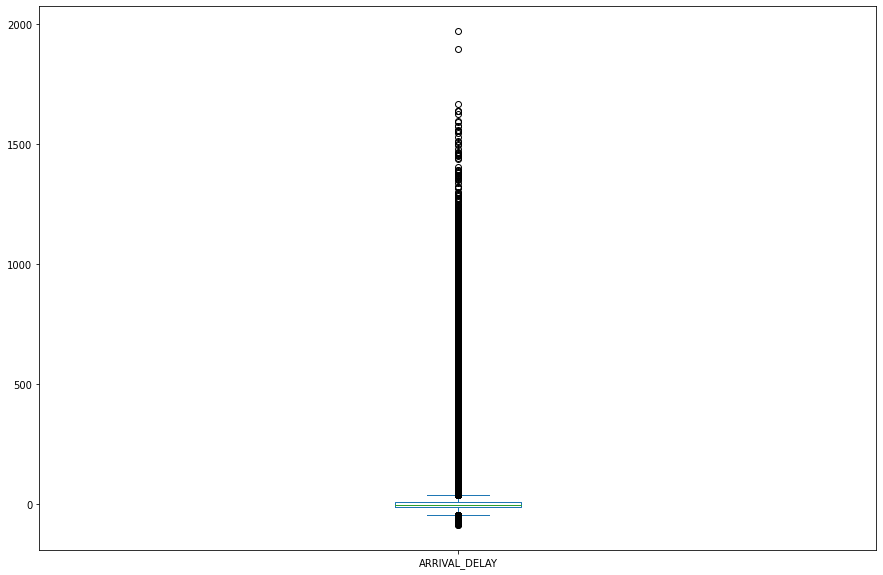

In [23]:
#Gráfica del diagrama de caja para visualizar outliers.
plt.figure(figsize=(15,10))
fdf.ARRIVAL_DELAY.plot(kind='box')

In [24]:
fdf['ARRIVAL_DELAY'].describe()

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [25]:
#Calculo del maximo y el minimo para saber los límites a los cuales ajustaremos la visualización.
Q1 = fdf['ARRIVAL_DELAY'].quantile(0.25)
Q3 = fdf['ARRIVAL_DELAY'].quantile(0.75)
IQR = Q3 - Q1
Minimum = Q1 - (1.5 * IQR)
Maximum = Q3 + (1.5 * IQR)
print("Minimum", Minimum)
print("Maximum", Maximum)

Minimum -44.5
Maximum 39.5


<AxesSubplot:ylabel='Frequency'>

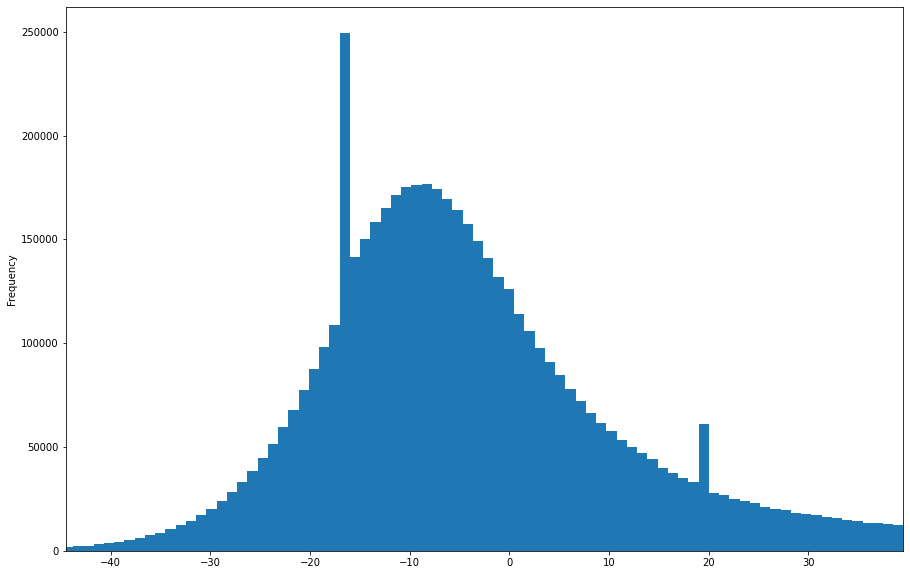

In [26]:
#Histograma de Arrival Delay.
plt.figure(figsize=(15,10))
plt.xlim(Minimum,Maximum)
fdf.ARRIVAL_DELAY.plot(kind='hist', bins=2000)

(-44.5, 39.5)

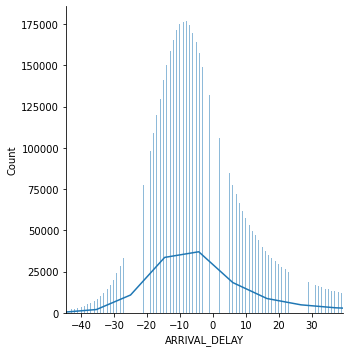

In [27]:
#Distribución de Arrival Delay.
sns.displot(data=fdf, x='ARRIVAL_DELAY', kde=True)
plt.xlim(Minimum,Maximum)

(-10.0, 10.0)

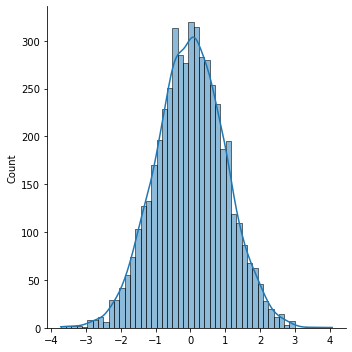

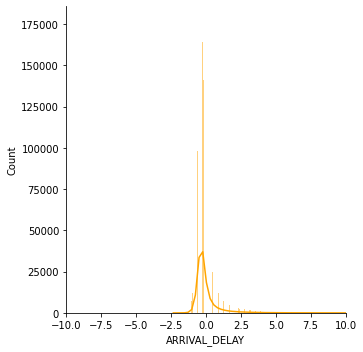

In [28]:
#Normalización de Arraival Delay.
ARRIVAL_DELAY_normalizada = (fdf.ARRIVAL_DELAY - fdf.ARRIVAL_DELAY.mean())/fdf.ARRIVAL_DELAY.std()

#Creamos una gráfica de distribución normal y una gráfica que nos muestre los datos de Arrival Delay normalizados.
# obtengamos una muestra aleatoria de una distribución normal
normal_sample = np.random.normal(size=5000)
sns.displot(x=normal_sample, kde=True)
sns.displot(x=ARRIVAL_DELAY_normalizada, kde=True, color='orange')
plt.xlim(-10,10)

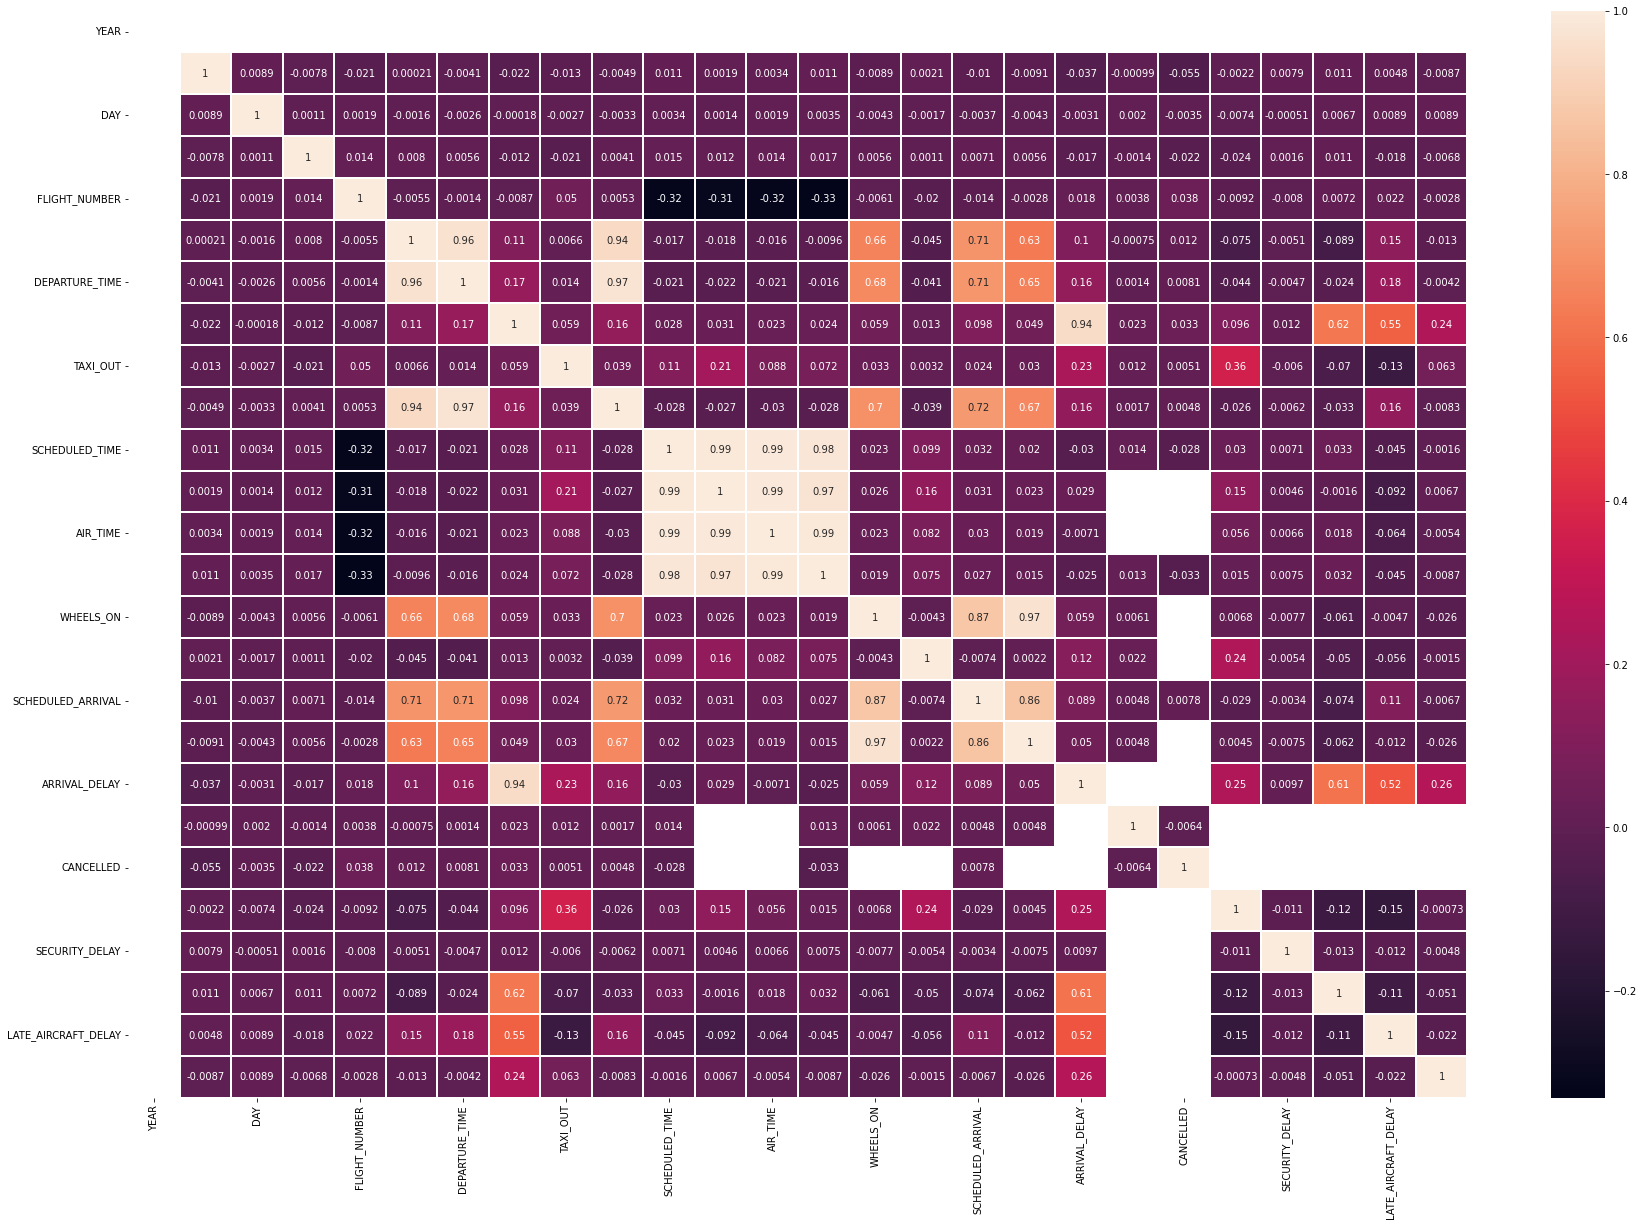

In [29]:
#Calcula la matriz de correlación
sns.heatmap(fdf.corr(), annot=True, linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(30,20)
plt.show()

### b. Imputación e interaccion entre variables

In [30]:
fdf.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

<AxesSubplot:>

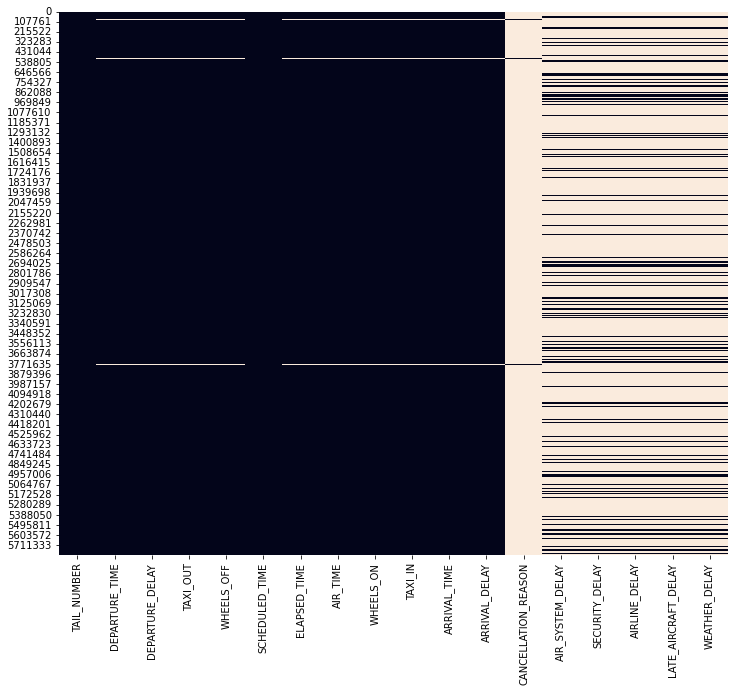

In [31]:
# Missing values cols
mcol = ["TAIL_NUMBER", "DEPARTURE_TIME", "DEPARTURE_DELAY", "TAXI_OUT", "WHEELS_OFF", "SCHEDULED_TIME", "ELAPSED_TIME", "AIR_TIME", "WHEELS_ON", "TAXI_IN", "ARRIVAL_TIME", "ARRIVAL_DELAY", "CANCELLATION_REASON", "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]
plt.figure(figsize=(12,10))
sns.heatmap(fdf[mcol].isnull(), cbar=False)

In [32]:
pd.DataFrame(round(100 * fdf.isnull().sum() /fdf.shape[0])).T

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,98.0,82.0,82.0,82.0,82.0,82.0


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Inicialmente observamos que hay varias variables con datos faltantes, y observamos que hay un patrón en este comportamiento, vamos a observar las filas de los datos faltantes para entender este comportamiento</li>
    
</ul>
</p>

In [33]:
pd.set_option('display.max_columns', None)
fdf[fdf['TAIL_NUMBER'].isna()].sample(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5700221,2015,12,24,4,UA,1538,NaN,FLL,EWR,606,NaN,NaN,NaN,NaN,175.0,NaN,NaN,1065,NaN,NaN,901,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
977051,2015,3,5,4,UA,1751,NaN,LGA,ORD,1905,NaN,NaN,NaN,NaN,169.0,NaN,NaN,733,NaN,NaN,2054,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
5064170,2015,11,13,5,WN,675,NaN,DAL,SAT,600,NaN,NaN,NaN,NaN,65.0,NaN,NaN,248,NaN,NaN,705,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3116951,2015,7,14,2,AA,1876,NaN,DCA,MCO,1750,NaN,NaN,NaN,NaN,137.0,NaN,NaN,759,NaN,NaN,2007,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5203605,2015,11,21,6,UA,214,NaN,SFO,ORD,2232,NaN,NaN,NaN,NaN,248.0,NaN,NaN,1846,NaN,NaN,440,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2756569,2015,6,23,2,UA,1929,NaN,EWR,DFW,640,NaN,NaN,NaN,NaN,219.0,NaN,NaN,1372,NaN,NaN,919,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
598680,2015,2,9,1,US,2184,NaN,DCA,LGA,1500,NaN,NaN,NaN,NaN,81.0,NaN,NaN,214,NaN,NaN,1621,NaN,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN
2339310,2015,5,29,5,WN,3220,NaN,MSY,HOU,545,NaN,NaN,NaN,NaN,75.0,NaN,NaN,302,NaN,NaN,700,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
4162626,2015,9,16,3,AA,2118,NaN,BOS,LGA,1800,NaN,NaN,NaN,NaN,89.0,NaN,NaN,184,NaN,NaN,1929,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
3509315,2015,8,6,4,F9,928,NaN,UST,TTN,1950,NaN,NaN,NaN,NaN,60.0,NaN,NaN,801,NaN,NaN,2150,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN


In [34]:
print(f"Todos los tail number faltantes corresponden a vuelos cancelados {fdf[fdf['TAIL_NUMBER'].isna()]['CANCELLED'].sum()}")
print(f"... que es el {fdf[fdf['TAIL_NUMBER'].isna()]['CANCELLED'].sum()/fdf.shape[0]*100:.2}% de los datos")


Todos los tail number faltantes corresponden a vuelos cancelados 14721
... que es el 0.25% de los datos


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Observamos que los valores con los tail number faltantes son de vuelos cancelados</li>
    <li>Al ser un vuelo cancelado, no puede ser un vuelo retrasado, por lo tanto esperamos que las columnas con las razones de los retrasos estén vacías
</ul>
</p>

In [35]:
print(f"Los tail number faltantes son el {(fdf['TAIL_NUMBER'].isna().sum() / fdf[fdf['CANCELLED']==1].shape[0] * 100):.2}% de los vuelos cancelados")

Los tail number faltantes son el 1.6e+01% de los vuelos cancelados


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Aunque hay mas vuelos cancelados que sí tienen tail number</li>
    <li>Estos vuelos puede que hayan comenzado procedimiento de despegue y fuera cancelado posteriormente y por eso algunos si fueron asignados tail number e incluso algunos conteos de operación</li>
</ul>
</p>

In [36]:
fdf[fdf['CANCELLED']==1][mcol].isna().sum()

TAIL_NUMBER            14721
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
TAXI_OUT               89047
WHEELS_OFF             89047
SCHEDULED_TIME             5
ELAPSED_TIME           89884
AIR_TIME               89884
WHEELS_ON              89884
TAXI_IN                89884
ARRIVAL_TIME           89884
ARRIVAL_DELAY          89884
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY       89884
SECURITY_DELAY         89884
AIRLINE_DELAY          89884
LATE_AIRCRAFT_DELAY    89884
WEATHER_DELAY          89884
dtype: int64

<AxesSubplot:>

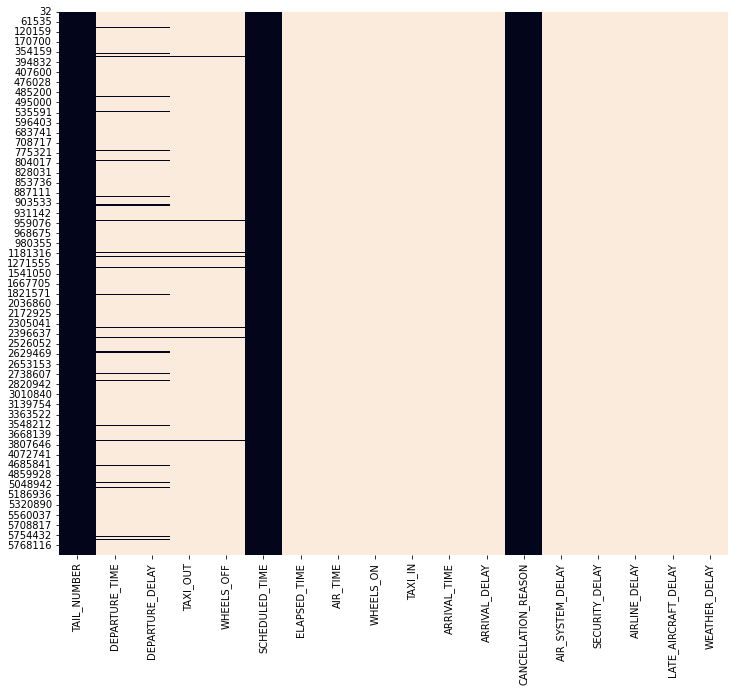

In [37]:
#fdf[fdf['CANCELLED']==1 & ~fdf['TAIL_NUMBER'].isnull()].head()
plt.figure(figsize=(12,10))
sns.heatmap(fdf[fdf['CANCELLED']==1 & ~fdf['TAIL_NUMBER'].isnull()][mcol].isnull(), cbar=False)

<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Algunos de los vuelos cancelados tienen registros de tiempo de salida y retraso, inlcudo despegue aunque fueron cancelados posteriormente</li>
</ul>
</p>

In [38]:
fdf[fdf['ARRIVAL_DELAY']>0].sample(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
12621,2015,1,1,4,MQ,2761,N532MQ,ORD,ABQ,2005,2000.0,-5.0,39.0,2039.0,183.0,219.0,173.0,1118,2232.0,7.0,2208,2239.0,31.0,0,0,NaN,31.0,0.0,0.0,0.0,0.0
3700213,2015,8,18,2,DL,1868,N923DN,AUS,ATL,1034,1044.0,10.0,11.0,1055.0,134.0,127.0,108.0,813,1343.0,8.0,1348,1351.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1765874,2015,4,23,4,US,466,N524UW,CLT,DEN,1155,1150.0,-5.0,21.0,1211.0,220.0,247.0,216.0,1337,1347.0,10.0,1335,1357.0,22.0,0,0,NaN,22.0,0.0,0.0,0.0,0.0
4699011,2015,10,20,2,AA,899,N740UW,10721,14100,1830,1830.0,0.0,36.0,1906.0,95.0,100.0,61.0,280,2007.0,3.0,2005,2010.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5399265,2015,12,4,5,AA,297,N851AA,LAX,HNL,1651,1645.0,-6.0,28.0,1713.0,364.0,371.0,339.0,2556,2052.0,4.0,2055,2056.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3631280,2015,8,14,5,MQ,3676,N517MQ,ORD,STL,705,715.0,10.0,27.0,742.0,76.0,73.0,43.0,258,825.0,3.0,821,828.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
168484,2015,1,11,7,WN,2329,N630WN,SFO,LAS,2130,2333.0,123.0,6.0,2339.0,85.0,73.0,62.0,414,41.0,5.0,2255,46.0,111.0,0,0,NaN,0.0,0.0,0.0,111.0,0.0
4197726,2015,9,18,5,OO,4973,N708SK,DSM,DEN,2010,2138.0,88.0,13.0,2151.0,115.0,109.0,91.0,589,2222.0,5.0,2105,2227.0,82.0,0,0,NaN,0.0,0.0,0.0,82.0,0.0
3008443,2015,7,8,3,WN,411,N764SW,LAS,OAK,1040,1050.0,10.0,15.0,1105.0,85.0,86.0,64.0,407,1209.0,7.0,1205,1216.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
346038,2015,1,23,5,DL,890,N966AT,TPA,JFK,1510,1519.0,9.0,15.0,1534.0,157.0,156.0,132.0,1005,1746.0,9.0,1747,1755.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Observamos que tienden a tener más datos en las columnas de delay, aunque algunas siguen siendo null</li>
    <li>No se observan registros de vuelos cancelados a primera instancia</li>
</ul>
</p>

In [39]:
fdf[~fdf["AIR_SYSTEM_DELAY"].isna()].isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1063439
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: int64

<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>La info que falta aquí solo son los valores de razones de cancelación, que es algo esperado</li>
</ul>
</p>

In [40]:
fdf[~fdf["AIR_SYSTEM_DELAY"].isna()].head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,72.0,9.0,246.0,204.0,175.0,156.0,1440,622.0,10.0,549,632.0,43.0,0,0,NaN,43.0,0.0,0.0,0.0,0.0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,145.0,0.0,16.0,201.0,370.0,385.0,361.0,2762,602.0,8.0,555,610.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,304.0,-3.0,25.0,329.0,173.0,196.0,160.0,1129,509.0,11.0,500,520.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,535.0,95.0,9.0,544.0,185.0,175.0,163.0,1189,727.0,3.0,605,730.0,85.0,0,0,NaN,0.0,0.0,85.0,0.0,0.0


<p>
<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    <li>Esperaríamos que los vuelos con retraso de llegada indicara un valor causante del retraso pero hay algunas instancias que no indican valores en las siguientes columnas</li>
    <li>AIR_SYSTEM_DELAY 	SECURITY_DELAY 	AIRLINE_DELAY 	LATE_AIRCRAFT_DELAY 	WEATHER_DELAY</li>
    <li> A estos valores podemos imputar valores de 0 </li>
</ul>
</p>


In [10]:
# dfdf = fdf[fdf["ARRIVAL_DELAY"]>0][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(value=0)
# Hacemos un subset para los registros únicamente con vuelos retrasados en su llegada
dfdf = fdf[fdf["ARRIVAL_DELAY"]>0].fillna(value=0)

In [11]:
dfdf.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,2086896.0,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,...,2.086896e+06,2.086896e+06,2086896.0,2086896.0,2086896.0,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06,2.086896e+06
mean,2015.0,6.308791e+00,1.562066e+01,3.901104e+00,2.192427e+03,1.408835e+03,1.439572e+03,3.029037e+01,1.931110e+01,1.463732e+03,...,1.543965e+03,3.311299e+01,0.0,0.0,0.0,6.869419e+00,3.880644e-02,9.666488e+00,1.196127e+01,1.485571e+00
std,0.0,3.415252e+00,8.771919e+00,1.969718e+00,1.793685e+03,4.687567e+02,4.926831e+02,5.460699e+01,1.213032e+01,4.959864e+02,...,5.632350e+02,5.294251e+01,0.0,0.0,0.0,2.109573e+01,1.530578e+00,3.566397e+01,3.299331e+01,1.465892e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,3.000000e+00,8.000000e+00,2.000000e+00,7.140000e+02,1.025000e+03,1.043000e+03,0.000000e+00,1.200000e+01,1.059000e+03,...,1.200000e+03,6.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,6.000000e+00,1.600000e+01,4.000000e+00,1.676000e+03,1.433000e+03,1.457000e+03,1.300000e+01,1.600000e+01,1.512000e+03,...,1.631000e+03,1.500000e+01,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,5.000000e+00,3.296000e+03,1.805000e+03,1.837000e+03,3.800000e+01,2.300000e+01,1.854000e+03,...,2.009000e+03,3.800000e+01,0.0,0.0,0.0,2.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,1.971000e+03,0.0,0.0,0.0,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [43]:
# Eliminamos los parámetros de los vuelos cancelados
dfdf.drop(["DIVERTED", "CANCELLED", "CANCELLATION_REASON"], axis=1, inplace=True)

<AxesSubplot:>

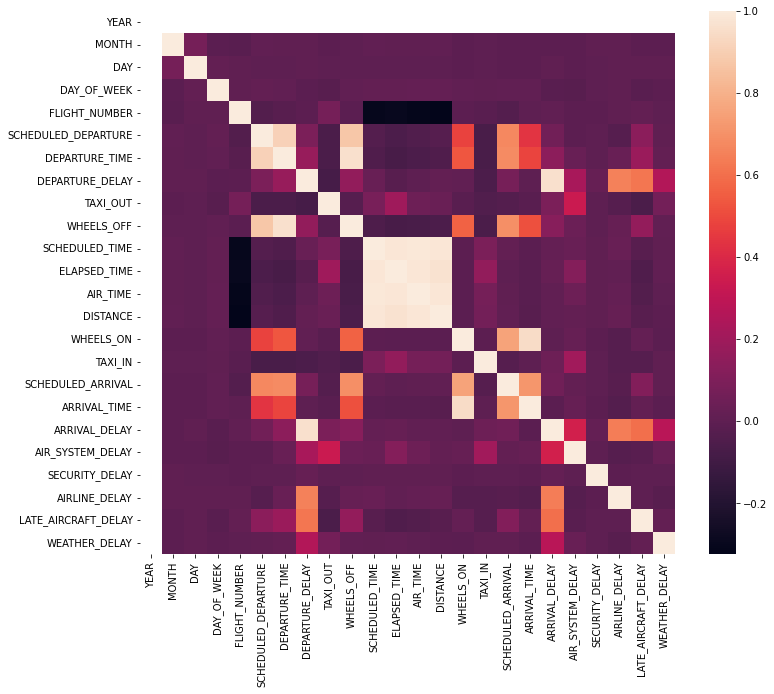

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(dfdf.corr())

<AxesSubplot:>

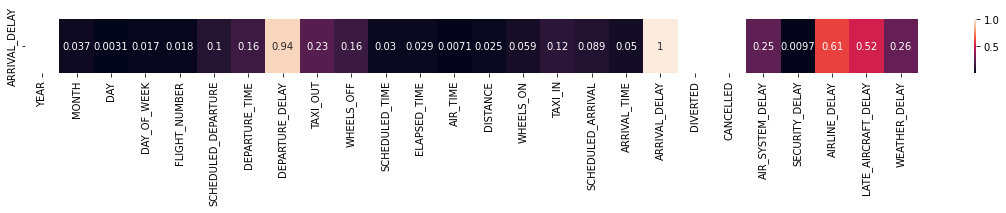

In [47]:
plt.figure(figsize=(20, 1))
sns.heatmap(pd.DataFrame(abs(fdf.corr()['ARRIVAL_DELAY'])).T, annot=True)

<AxesSubplot:>

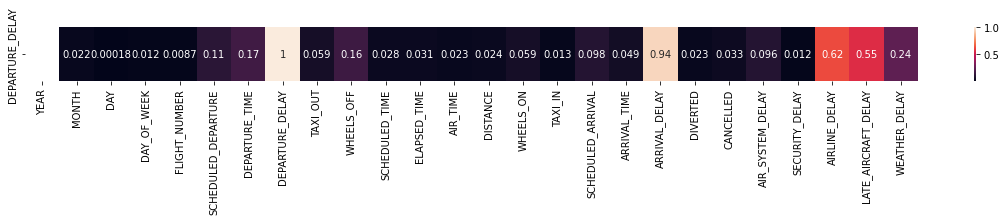

In [5]:
plt.figure(figsize=(20, 1))
sns.heatmap(pd.DataFrame(abs(fdf.corr()['DEPARTURE_DELAY'])).T, annot=True)

In [48]:
# Podemos imputar los valores en nuestro main dataset
fdf[['SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = fdf[['SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(value=0)

In [49]:
fdf.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               0
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: int64

<p style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    Los valores restantes tienen que ver con la falta de registros por la cancelación de los vuelos.<br>
    Creamos un subset con los registros de vuelos retrasados; en este podemos eliminar la información de los vuelos cancelados y concentrarnos en las variables que afectan los restrasos.
</p>

|Variable | Missing value | Comment |
|------------|------------------|---|
|TAIL_NUMBER |              14721| Los tail number faltantes son por vuelos cancelados|
|DEPARTURE_TIME |           86153| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|DEPARTURE_DELAY |          86153| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|TAXI_OUT |                 89047| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|WHEELS_OFF |               89047| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|SCHEDULED_TIME |               6| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|ELAPSED_TIME |            105071| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|AIR_TIME |                105071| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|WHEELS_ON |                92513| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|TAXI_IN |                  92513| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|ARRIVAL_TIME |             92513| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|ARRIVAL_DELAY |           105071| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|CANCELLATION_REASON |    5729195| Los valores de operaciones faltantes se dan debido a los vuelos cancelados|
|AIR_SYSTEM_DELAY |       4755640| Estos registros dan información de causas de retraso y fueron imputados|
|SECURITY_DELAY |         4755640| Estos registros dan información de causas de retraso y fueron imputados|
|AIRLINE_DELAY |          4755640| Estos registros dan información de causas de retraso y fueron imputados|
|LATE_AIRCRAFT_DELAY |    4755640| Estos registros dan información de causas de retraso y fueron imputados|
|WEATHER_DELAY |          4755640| Estos registros dan información de causas de retraso y fueron imputados|

<p style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
    En conclusión, los registros no contendrán información de retraso si el vuelo fue cancelado y viceversa.
    El comportamiento es consistente, por lo que podemos usar la informacion que se nos da tomando esto en cuenta. De igual manera, podemos hacer un subset con la info de los registros de vuelos retrasados e imputar datos para trabajar específicamente con estos datos
</p>

<p style="margin: 100px 0 100px; font-family: Arial; font-size: 50px">
    36E
</p>

In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from statsmodels.stats.weightstats import ztest
from sklearn import cluster as C
from sklearn.decomposition import PCA

airline_path = '../../../datasets/airlines.csv'
#airport_path = 'datasets/airports.csv'
flights_path = '../../../datasets/flights.csv'

In [2]:
# Set data on import
def parse_if_str(s):
    try: return str(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

# def parse_ndarray(s):
#     return np.fromstring(s, sep=' ') if s else None

In [3]:
fdf = pd.read_csv(flights_path, converters = {
    'DESTINATION_AIRPORT': parse_if_str,
    'ORIGIN_AIRPORT': parse_if_str})

In [4]:
# dfdf = fdf[fdf["ARRIVAL_DELAY"]>0][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(value=0)
# Hacemos un subset para los registros únicamente con vuelos retrasados en su llegada
dfdf = fdf[fdf["ARRIVAL_DELAY"]>0].fillna(value=0)

# Eliminamos los parámetros de los vuelos cancelados
dfdf.drop(["DIVERTED", "CANCELLED", "CANCELLATION_REASON"], axis=1, inplace=True)

1. ¿Es posible habilitar ahorros al mitigar o eliminar los retrasos en los vuelos?
    - Sí, se muestra un modelo de regresión que busca predecir los retrasos
    
2. ¿El patrón de los retrasos de vuelos está sujeto a periodos de tiempo o es un patrón aleatorio?
    - No, visualizamos los datos con respecto al tiempo para buscar un comportamiento evidente.
    - Utilizamos un modelo de agrupamiento para intentar agrupar por comportamientos (kmeans/dbscan)
    
3. ¿Cómo podrías generar un forecast para el año 2016?, Y si tuvieras el forecast del 2016 ¿Cuánto dinero representaría la perdida por compensaciones de retraso?
    - Utilizamos un modelo de regresión que considera los datos de las aerolineas, las rutas y hora de despegue para predecir cuándo un vuelo tendrá un retraso
    - Depende del porcentaje de precisión estimado del modelo * el estimado de pérdidas (según tabla de costos propocionada: $ 27,359,750.00)
    
4. ¿A qué conclusiones ha llegado tu estudio?
    - No es muy evidente un comportamiento por fechas (utilizando todos los datos), posiblemente al separar por segmentos de fecha u otro parámetro (e.g. aerolinea o ruta) podríamos identificar algún patrón
    - Tomando en cuenta que algunas aerolíneas tienen compotramiento distinto de retrasos, así como que las rutas pueden representar comportamiento distintos unas con otras para las aeronaves, el modelo que utilizamos parece indicar que hay una relación que nos puede ayudar a predecir algunos retrasos.
    
5. Justifica la técnica de modelado que has utilizado
    - Se utilizaron los modelos de regresión linear, Lasso y Ridge para evaluar el modelo (80% para train y 20% test)
    - El modelo usa algunos parámetros que parecen influenciar más según nuestra matriz de correlación:
    
|Parámetros de interés|
|:-:|
|AIRLINE|
|ORIGIN_AIRPORT|
|DESTINATION_AIRPORT|
|SCHEDULED_DEPARTURE|
    
6. ¿Qué métrica de evaluación has utilizado? Y ¿Qué valores tiene?
    - Se utilizó el mean squared error (MSE) para comparar los valores predichos por el modelo y los valores del train set; para identificar que tan bien estaba modelando los retrasos el modelo.
    - El valor del modelo Ridge da un MSE de (%): 1.79
    
    
7. ¿Qué otro atributo te ayudaría a mejorar el desempeño de tu modelo, que actualmente no está en el conjunto de datos?
    - Contar con información del clima para los datos de vuelo podría ayudar a encontrar otros patrones de comportamiento útiles para el modelo que podrían represetnar retrasos.


In [5]:
# Añadir columna de fecha a partir de columnas year, month y day
dfdf.insert(0, 'DATE', pd.to_datetime(dfdf[['YEAR','MONTH', 'DAY']]))

In [6]:
date_delay = dfdf[['DATE', 'ARRIVAL_DELAY']]
date_delay['DATE'] = date_delay['DATE'].apply(lambda x: x.value)

C:\Users\jonat\AppData\Local\Temp\ipykernel_10036\1551662505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_delay['DATE'] = date_delay['DATE'].apply(lambda x: x.value)


In [7]:
date_delay.head()

,DATE,ARRIVAL_DELAY
2,1420070400000000000,5.0
5,1420070400000000000,8.0
14,1420070400000000000,8.0
20,1420070400000000000,6.0
21,1420070400000000000,1.0


<AxesSubplot:xlabel='DATE', ylabel='ARRIVAL_DELAY'>

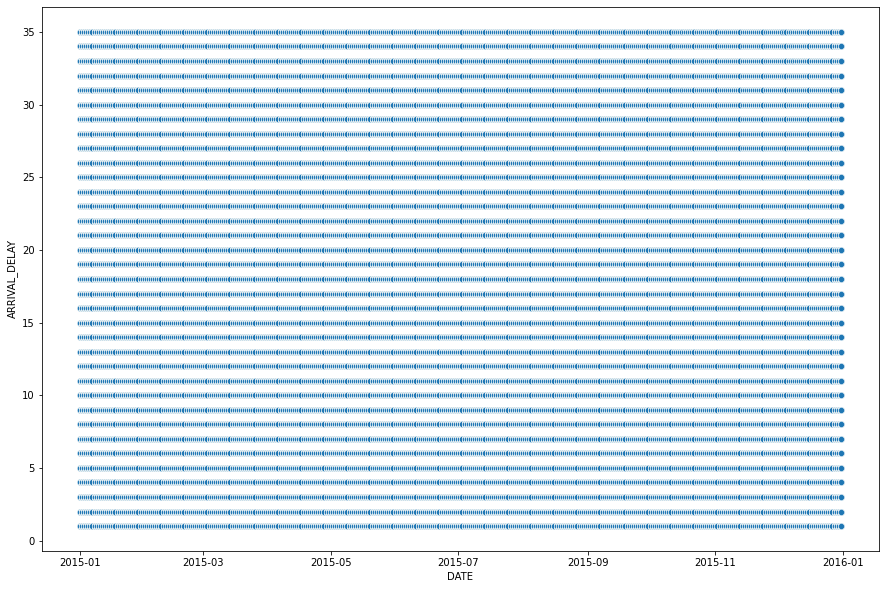

In [90]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=dfdf, x='DATE', y='ARRIVAL_DELAY')

C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


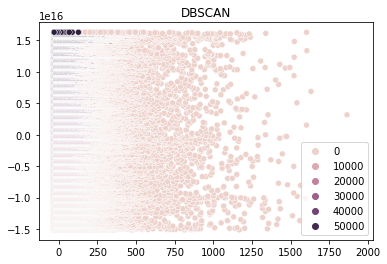

In [9]:
# Preparando X
X = date_delay.values

# Preparemos varios modelos de Agrupamiento
# from sklearn import cluster as C

modelos = [
    ('DBSCAN', C.DBSCAN(eps=0.95, min_samples=3)),
    ('MeanShift', C.MeanShift(bandwidth=2)),
    ('KMeans', C.KMeans(n_clusters=3))
]

# Entrenar Modelos
# for m in modelos:
#     m[1].fit(X)

modelos[0][1].fit(X)

# Ver resultados del Agrupamiento
# (Usemos un PCA de 2 dimensiones para proyectar las poblaciones a una grafica 2D)
# from sklearn.decomposition import PCA
X_2d = PCA(2).fit_transform(X)

# for m in modelos:    
#     sns.scatterplot(
#         data=None,
#         y=X_2d.T[0],
#         x=X_2d.T[1],
#         hue=m[1].labels_
#     )
#     plt.title( m[0] )
#     plt.show()

sns.scatterplot(
    data=None,
    y=X_2d.T[0],
    x=X_2d.T[1],
    hue=modelos[0][1].labels_
)
plt.title( modelos[0][0] )
plt.show()

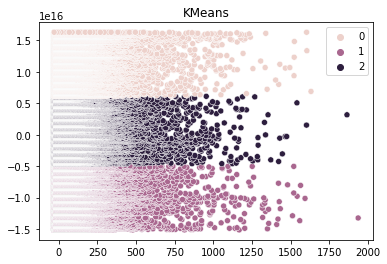

In [10]:
modelos[2][1].fit(X)

# Ver resultados del Agrupamiento
# (Usemos un PCA de 2 dimensiones para proyectar las poblaciones a una grafica 2D)
# from sklearn.decomposition import PCA
X_2d = PCA(2).fit_transform(X)

sns.scatterplot(
    data=None,
    y=X_2d.T[0],
    x=X_2d.T[1],
    hue=modelos[2][1].labels_
)
plt.title( modelos[2][0] )
plt.show()

AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64

<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
        <li>Por fecha no parece haber un patrón</li>
        <li>Podemos observar en otros parámetros</li>
</ul>

<AxesSubplot:xlabel='AIRLINE', ylabel='ARRIVAL_DELAY'>

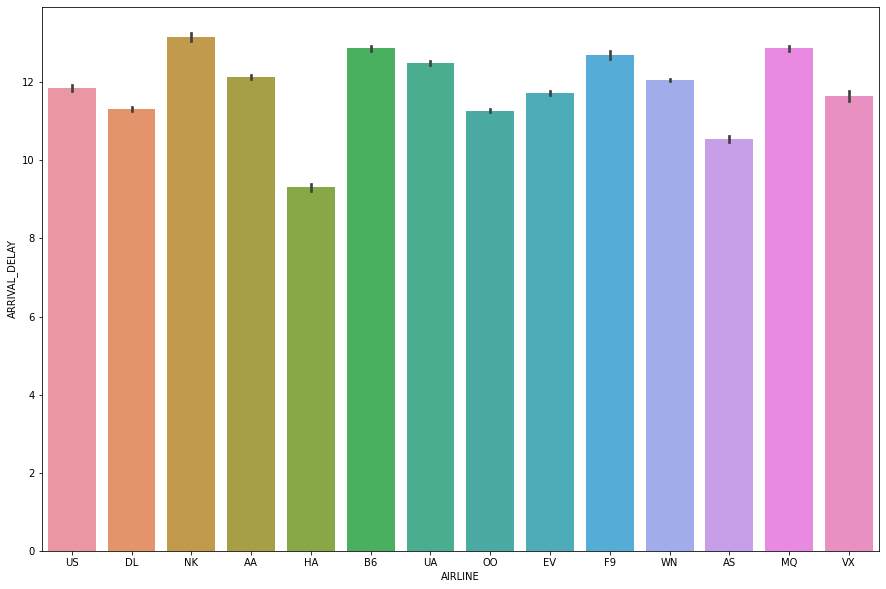

In [91]:
plt.figure(figsize=(15,10))
sns.barplot(x='AIRLINE',y='ARRIVAL_DELAY',data=dfdf, ci=95)

<AxesSubplot:>

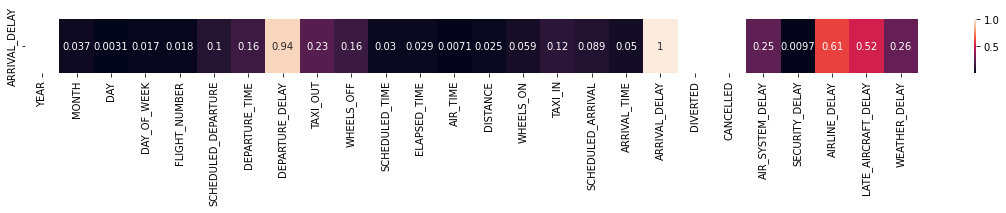

In [92]:
plt.figure(figsize=(20, 1))
sns.heatmap(pd.DataFrame(abs(fdf.corr()['ARRIVAL_DELAY'])).T, annot=True)

|Parámetros de interés|
|:-:|
|AIRLINE|
|ORIGIN_AIRPORT|
|DESTINATION_AIRPORT|
|SCHEDULED_DEPARTURE|
|DEPARTURE_TIME|

In [39]:
# Target variables
tarv = ['DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME']

## Regularizando

Filas antes de quitar outliers: 1880760


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


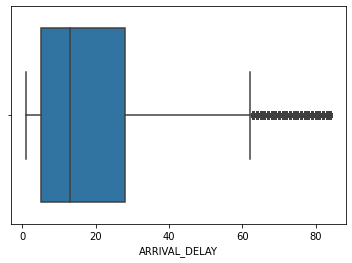

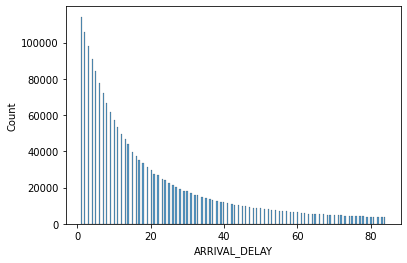

Filas despues de quitar outliers: 1695130


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


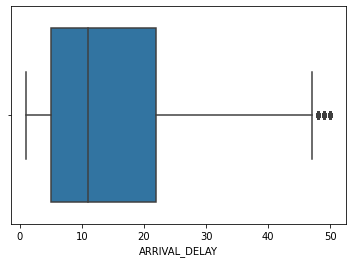

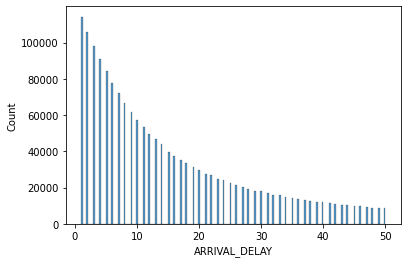

In [41]:
# Eliminar los outliers de Y (precio)

print('Filas antes de quitar outliers:', len(dfdf))
sns.boxplot(dfdf['ARRIVAL_DELAY'])
plt.show()
sns.histplot(dfdf['ARRIVAL_DELAY'])
plt.show()


dfdf = dfdf[ dfdf['ARRIVAL_DELAY'] <= dfdf['ARRIVAL_DELAY'].quantile(.90) ]

print('Filas despues de quitar outliers:', len(dfdf))
sns.boxplot( dfdf['ARRIVAL_DELAY'] )
plt.show()
sns.histplot( dfdf['ARRIVAL_DELAY'] )
plt.show()

In [42]:
X = dfdf[tarv]
y = dfdf['ARRIVAL_DELAY']

In [43]:
X['DATE'] = X['DATE'].apply(lambda x: x.value)

C:\Users\jonat\AppData\Local\Temp\ipykernel_10036\2878938863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DATE'] = X['DATE'].apply(lambda x: x.value)


In [44]:
# Codificando
static = pd.get_dummies(X.AIRLINE, X.ORIGIN_AIRPORT, X.DESTINATION_AIRPORT)
X = pd.concat([X, static], axis=1)
X.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1, inplace=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('X entrenamiento (filas, columnas):', X_train.shape)
print('Y entrenamiento (filas, columnas):', y_train.shape)
print()
print('X prueba (filas, columnas):', X_test.shape)
print('Y prueba (filas, columnas):', y_test.shape)

X entrenamiento (filas, columnas): (1356104, 17)
Y entrenamiento (filas, columnas): (1356104,)

X prueba (filas, columnas): (339026, 17)
Y prueba (filas, columnas): (339026,)


In [46]:
from sklearn import linear_model as L

modelos = (
    ('Regresion', L.LinearRegression()),
    ('Lasso', L.Lasso()),
    ('Ridge', L.Ridge())
)

desempeños = []
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_hat = modelo.predict(X_test)
    desempeño = mean_absolute_percentage_error(y_test, y_hat)
    print(nombre, 'MSE (%):', desempeño)
    desempeños.append(desempeño)  

Regresion MSE (%): 2.1072874387792364
Lasso MSE (%): 2.1074953581999236
Ridge MSE (%): 2.0903887571109574


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.96243e-39): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARRIVAL_DELAY'>

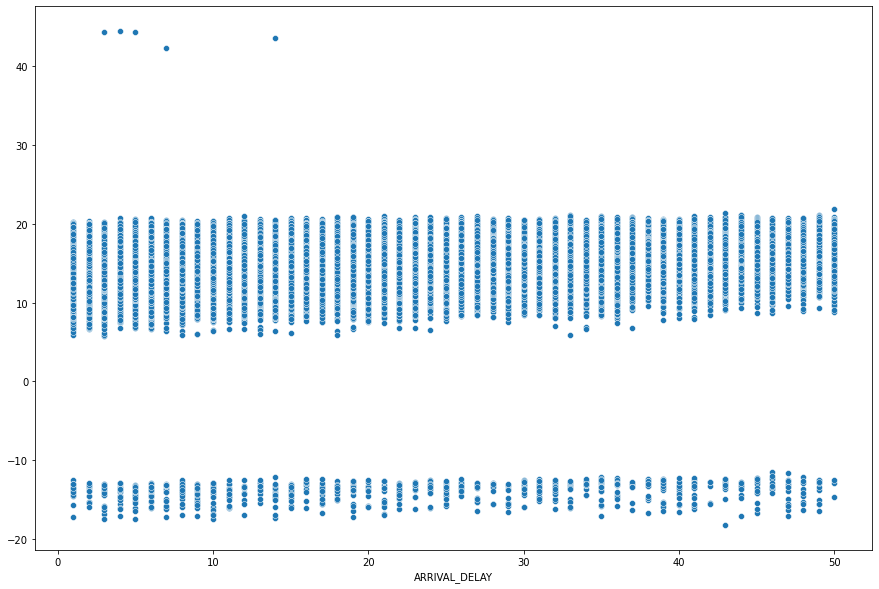

In [51]:
plt.figure(figsize=(15, 10))
sns.scatterplot(y_test, y_hat)

<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
        <li>Sí contáramos con la información de: fecha, aerolínea, ruta, y diferencia entre despegue planeado y despegue realizado, podríamos establecer si será un retraso con un 2.09% de error (aunque estamos limitados a vuelos ya operando)</li>
        <li>#</li>
</ul>

# Sin departure time (previo a operación)

|Parámetros de interés|
|:-:|
|AIRLINE|
|ORIGIN_AIRPORT|
|DESTINATION_AIRPORT|
|SCHEDULED_DEPARTURE|

In [52]:
# Target variables
tarv = ['DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE']

## Regularizando

Filas antes de quitar outliers: 1695130


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


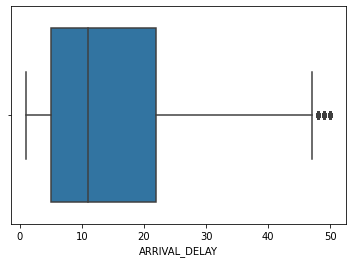

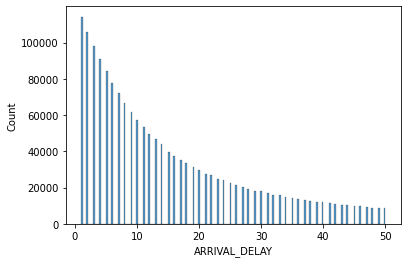

Filas despues de quitar outliers: 1532396


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


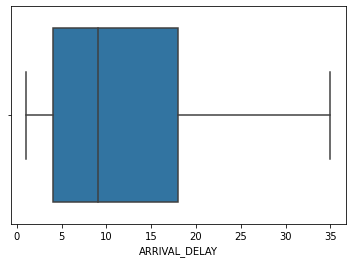

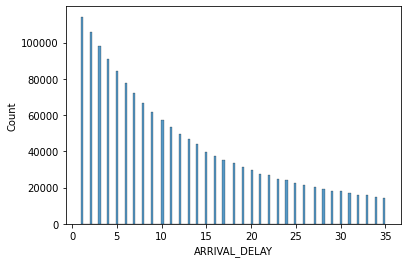

In [53]:
# Eliminar los outliers de Y (precio)

print('Filas antes de quitar outliers:', len(dfdf))
sns.boxplot(dfdf['ARRIVAL_DELAY'])
plt.show()
sns.histplot(dfdf['ARRIVAL_DELAY'])
plt.show()


dfdf = dfdf[ dfdf['ARRIVAL_DELAY'] <= dfdf['ARRIVAL_DELAY'].quantile(.90) ]

print('Filas despues de quitar outliers:', len(dfdf))
sns.boxplot( dfdf['ARRIVAL_DELAY'] )
plt.show()
sns.histplot( dfdf['ARRIVAL_DELAY'] )
plt.show()

In [54]:
X = dfdf[tarv]
y = dfdf['ARRIVAL_DELAY']

In [55]:
X['DATE'] = X['DATE'].apply(lambda x: x.value)

C:\Users\jonat\AppData\Local\Temp\ipykernel_10036\2878938863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DATE'] = X['DATE'].apply(lambda x: x.value)


In [56]:
# Codificando
static = pd.get_dummies(X.AIRLINE, X.ORIGIN_AIRPORT, X.DESTINATION_AIRPORT)
X = pd.concat([X, static], axis=1)
X.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1, inplace=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('X entrenamiento (filas, columnas):', X_train.shape)
print('Y entrenamiento (filas, columnas):', y_train.shape)
print()
print('X prueba (filas, columnas):', X_test.shape)
print('Y prueba (filas, columnas):', y_test.shape)

X entrenamiento (filas, columnas): (1225916, 16)
Y entrenamiento (filas, columnas): (1225916,)

X prueba (filas, columnas): (306480, 16)
Y prueba (filas, columnas): (306480,)


In [58]:
from sklearn import linear_model as L

modelos = (
    ('Regresion', L.LinearRegression()),
    ('Lasso', L.Lasso()),
    ('Ridge', L.Ridge())
)

desempeños = []
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_hat = modelo.predict(X_test)
    desempeño = mean_absolute_percentage_error(y_test, y_hat)
    print(nombre, 'MSE (%):', desempeño)
    desempeños.append(desempeño)  

Regresion MSE (%): 1.801763395558153


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.458e+06, tolerance: 1.040e+04
  model = cd_fast.enet_coordinate_descent(


Lasso MSE (%): 1.8017768789795408
Ridge MSE (%): 1.7924916974244398


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.92239e-39): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARRIVAL_DELAY'>

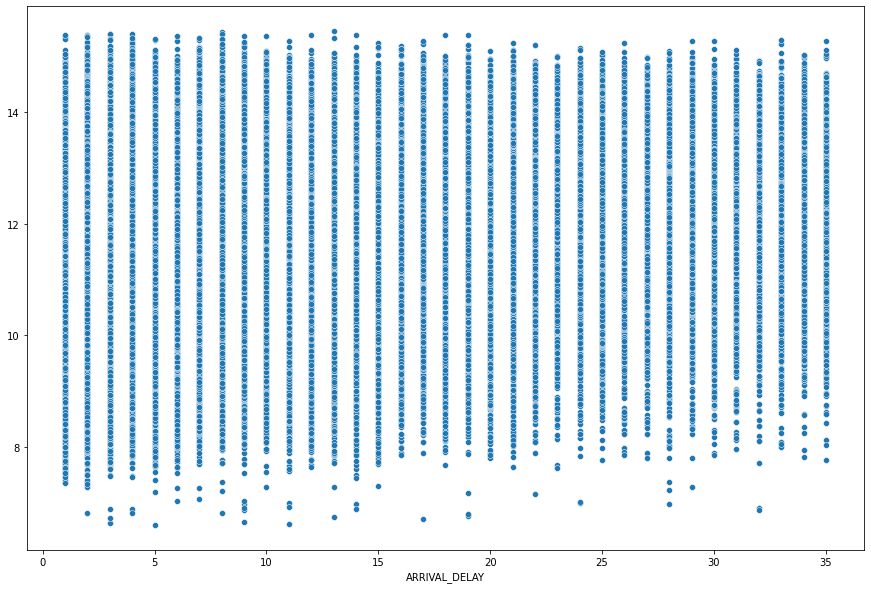

In [59]:
plt.figure(figsize=(15, 10))
sns.scatterplot(y_test, y_hat)

<ul style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
        <li>Sí contáramos con la información de: fecha, aerolínea, ruta, y hora de despegue, podríamos establecer si será un retraso con un 1.79% de error</li>
</ul>

## Costo calculado de los retrasos

In [61]:
dfdf['ARRIVAL_DELAY'].describe()

count    1.532396e+06
mean     1.189201e+01
std      9.210245e+00
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.800000e+01
max      3.500000e+01
Name: ARRIVAL_DELAY, dtype: float64

In [68]:
def aircosts(num):
    return (1000, (500, (250, (100, (50, 0)[num<=15])[num<=30])[num<=60])[num<=120])[num<=180]

In [70]:
dfdf['delay_costs'] = dfdf['ARRIVAL_DELAY'].apply(lambda x: aircosts(x))

In [89]:
print(f"Total costs of 2015 delays are: ${dfdf['delay_costs'].sum():20,.2f}")
print(f"Potential savings are: ${(100-desempeño) * dfdf['delay_costs'].sum()/100:20,.2f}?")

Total costs of 2015 delays are: $       27,359,750.00
Potential savings are: $       26,869,328.75?


<p style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
        26.9 MUSD of savings???
</p>


In [101]:
# Target variables
tarv = ['DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']

## Regularizando

C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


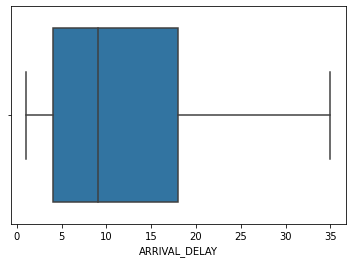

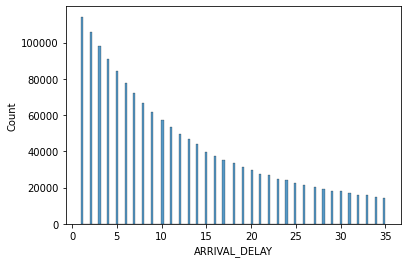

In [102]:
# Eliminar los outliers de Y (precio)

# print('Filas antes de quitar outliers:', len(dfdf))
# sns.boxplot(dfdf['ARRIVAL_DELAY'])
# plt.show()
# sns.histplot(dfdf['ARRIVAL_DELAY'])
# plt.show()


# dfdf = dfdf[ dfdf['ARRIVAL_DELAY'] <= dfdf['ARRIVAL_DELAY'].quantile(.90) ]

# print('Filas despues de quitar outliers:', len(dfdf))
sns.boxplot( dfdf['ARRIVAL_DELAY'] )
plt.show()
sns.histplot( dfdf['ARRIVAL_DELAY'] )
plt.show()

In [103]:
X = dfdf[tarv]
y = dfdf['ARRIVAL_DELAY']

In [104]:
X['DATE'] = X['DATE'].apply(lambda x: x.value)

C:\Users\jonat\AppData\Local\Temp\ipykernel_10036\2878938863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DATE'] = X['DATE'].apply(lambda x: x.value)


In [105]:
# Codificando
static = pd.get_dummies(X.AIRLINE, X.ORIGIN_AIRPORT, X.DESTINATION_AIRPORT)
X = pd.concat([X, static], axis=1)
X.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1, inplace=True)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('X entrenamiento (filas, columnas):', X_train.shape)
print('Y entrenamiento (filas, columnas):', y_train.shape)
print()
print('X prueba (filas, columnas):', X_test.shape)
print('Y prueba (filas, columnas):', y_test.shape)

X entrenamiento (filas, columnas): (1225916, 19)
Y entrenamiento (filas, columnas): (1225916,)

X prueba (filas, columnas): (306480, 19)
Y prueba (filas, columnas): (306480,)


In [107]:
from sklearn import linear_model as L

modelos = (
    ('Regresion', L.LinearRegression()),
    ('Lasso', L.Lasso()),
    ('Ridge', L.Ridge())
)

desempeños = []
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_hat = modelo.predict(X_test)
    desempeño = mean_absolute_percentage_error(y_test, y_hat)
    print(nombre, 'MSE (%):', desempeño)
    desempeños.append(desempeño)  

Regresion MSE (%): 1.1750524254451182
Lasso MSE (%): 1.1909944986711134
Ridge MSE (%): 1.166799354811812


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.91633e-39): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


C:\Users\jonat\anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ARRIVAL_DELAY'>

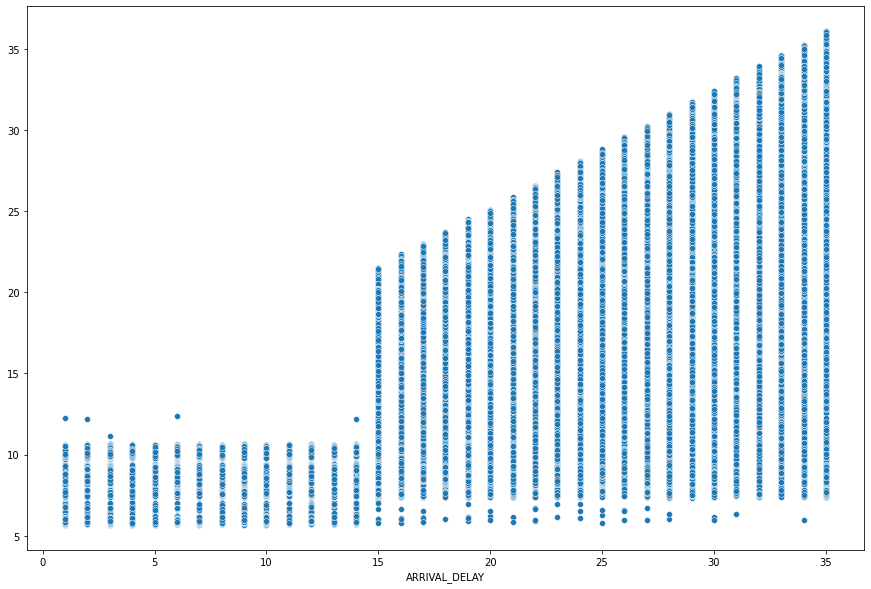

In [108]:
plt.figure(figsize=(15, 10))
sns.scatterplot(y_test, y_hat)

In [109]:
print(f"Total costs of 2015 delays are: ${dfdf['delay_costs'].sum():20,.2f}")
print(f"Potential savings are: ${(100-desempeño) * dfdf['delay_costs'].sum()/100:20,.2f}?")

Total costs of 2015 delays are: $       27,359,750.00
Potential savings are: $       27,040,516.61?


<p style="margin: 100px 0 100px; font-family: Arial; font-size: 20px">
        27 MUSD of savings???
</p>


In [115]:
fdf.shape

(5819079, 31)